In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
reg_train = pd.read_feather('train_clean')
reg_train.head()

,store_nbr,item_nbr,unit_sales,onpromotion,year,month,dayofmonth,dayofweek
0,25,103665,7.0,False,2013,1,1,1
1,25,105574,1.0,False,2013,1,1,1
2,25,105575,2.0,False,2013,1,1,1
3,25,108079,1.0,False,2013,1,1,1
4,25,108701,1.0,False,2013,1,1,1


In [4]:
test = pd.read_feather('test_clean')
test.head()
test_ids = pd.read_feather('test_ids')

In [5]:
x_test = test.values

In [7]:
X = reg_train[['store_nbr', 'item_nbr', 'onpromotion', 'year', 'month', 'dayofmonth', 'dayofweek']].values
y = reg_train['unit_sales'].values

In [8]:
regr = linear_model.LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=-1)
regr.fit(X, y)
y_pred = regr.predict(X)

print('Coefficients: \n', regr.coef_)

print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))

print('Variance score: %.2f' % r2_score(y, y_pred))

Coefficients: 
 [  6.41358140e-02   9.99297759e-07   5.60264767e+00  -5.70317604e-01
   2.30071973e-03  -3.48778831e-02   3.87646733e-01]
Mean squared error: 553.24
Variance score: 0.01


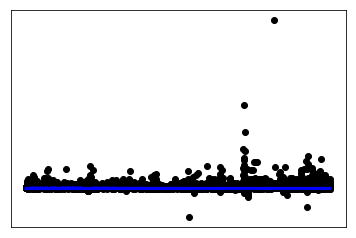

In [15]:
# plt.scatter(reg_train['date'].values, y,  color='black')
# plt.plot(reg_train['date'].values, y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

In [10]:
test_preds = regr.predict(x_test)

In [28]:
test_ids = np.reshape(test_ids.values, (len(test_preds)))

In [30]:
sub = pd.DataFrame({'id': testids, 'unit_sales': test_preds})

In [31]:
sub.head()

,id,unit_sales
0,125497040,4.206164
1,125497041,4.208364
2,125497042,4.212665
3,125497043,4.212684
4,125497044,4.212829


In [32]:
sub.to_csv('./submission_ols_3.csv', index=False)